<img src="./images/header.png">

***

# Projeto 2 - Experimento SOM

Discente: Willian Vieira de Oliveira

Doscente: Dr. Marcos Quiles

## Descrição do projeto

Utilizar a rede **Self-Organizing Maps (SOM)** para realizar testes com pelo menos 3 datasets selecionados do repositório da UCI (iris, etc...), variando a vizinhança e taxa de aprendizagem. Usar o dataset 'iris' para debug.

Apresentar, pelo menos, os seguintes mapas:
    - U-Matrix;
    - Hit map e Heat maps;
    - Erro de quantização e topográfico.

***

### Datasets selecionados

Para a realização desse projeto foram selecionados três datasets do repositório da UCI a partir do pacote scikit-learn. Os datasets selecionados são: iris, breast cancer e digits.

In [1]:
from sklearn.datasets import load_iris, load_breast_cancer, load_digits#, load_boston, load_wine

Outros datasets do repositório da UCI que estão disponíveis a partir desse pacote são descritos no website: 
https://scikit-learn.org/stable/datasets/index.html

### Pacotes utilizados

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

from matplotlib.gridspec import GridSpec
import seaborn as sns
import sys
sys.path.insert(0, '../')

### Funções auxiliares

Foram utilizadas as seguintes funções auxiliares: 'SOM_classification', para classificação dos datasets utilizando a rede SOM e cálculo dos erros de quantização e topográficos; e, 'U_matrix', 'Hitmap', 'Heatmap' and 'ClassPies', para visualização dos resultados obtidos pela rede SOM a partir de diferentes tipos de gráficos.

#### Classificação SOM

- **Descrição de alguns parâmetros utilizados pelo SOM (MiniSom):**
    - **x:** int;
        - Dimensão x do SOM.
    - **y:** int;
        - Dimensão y do SOM.
    - **input_len:** int;
        - número de elementos dos vetores de entrada.
    - **sigma:** float, opcional, padrão 1.0;
        - Espalhamento da fun~c"ao de vizinhança, precisa ser adequada às dimensõesd do mapa.
        - Na iteração t, nós temos sigm(t)=sigma/(1 + t/T), onde T é #num_iteration/2.
    - **learning_rate:** taxa de aprendizado inicial;
        - Na iteração t, nós temos learning_rate(t) = learning_rate / (1 + t/T), onde T é #num_iteration/2.
    - **neighborhood_function:** função, opcional, padrão 'gaussian'
        - Função que pondera a vizinhança de uma posição no mapa. Função de vizinhança para preservar as propriedades topolóticas do espaço de entrada.
        - {'gaussian', 'mexican_hat', 'bublle', 'triangle'}, default 'gaussian'
    - **random_seed:** int, opcional, padrão 'None'
        - Semente aleatória a ser utilizada 

In [318]:
# using the MiniSom package
def SOM_classification(data, x=7, y=7, input_len=4, sigma=3, learning_rate=0.5, neighborhood_function='triangle', 
                       Num_iterations=1000, dataset_name="Quantization and topographic errors"):
    # Initialization and training
    som = MiniSom(x=x, y=y, input_len=input_len, sigma=sigma, learning_rate=learning_rate, 
                  neighborhood_function=neighborhood_function)
    
    som.pca_weights_init(data)
    
    q_error = []
    t_error = []
    iter_x = []
    for i in range(Num_iterations):
        percent = 100*(i+1)/Num_iterations
        rand_i = np.random.randint(len(data)) # This corresponds to train_random() method.
        som.update(data[rand_i], som.winner(data[rand_i]), i, Num_iterations)
        if (i+1) % 100 == 0:
            q_error.append(som.quantization_error(data))
            t_error.append(som.topographic_error(data))
            iter_x.append(i)
            sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}%')
    
    print("\n\nTraining the model with a initial learning rate of "+str(learning_rate)+" and '"+ 
          neighborhood_function+"' neighbouring function...")
    som.train_batch(data, Num_iterations, verbose=True)  # random training
    print("\n")
    #print("\n...ready!")
    
    return som, iter_x, q_error, t_error

In [391]:
def U_matrix(som, x, y, x_inicial=0, y_inicial=0): 
    # Returns the distance map of the weights.
    # Each cell is the normalised sum of the distances between a neuron and its neighbours.
    
    plt.figure(figsize=(x, y))
    # Plotting the response for each pattern in the iris dataset
    plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()

    # use different colors and markers for each label
    markers = ['o', 's', 'D', 'p', 'P', 'X', '*', 'o', 's', 'D']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
    for cnt, xx in enumerate(data):
        w = som.winner(xx)  # getting the winner
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, markers[targets[cnt]], markerfacecolor='None',
                 markeredgecolor=colors[targets[cnt]], markersize=12, markeredgewidth=2)
    plt.axis([x_inicial, x, y_inicial, y])
    plt.show()

In [200]:
def Hitmap(som, data, x, y):
    plt.figure(figsize=(x, y))
    frequencies = som.activation_response(data)
    plt.pcolor(frequencies.T, cmap='Blues') 
    for (i, j), z in np.ndenumerate(frequencies.T):
        plt.text(j+0.5, i+0.5, '{:0.1f}'.format(z), ha='center', va='center')
    plt.colorbar()
    plt.show()

In [201]:
def Heatmap(som, x, y):
    sns.set(rc={'figure.figsize':{x,y+1}})
    sns.heatmap(som.distance_map(),annot=True,cmap="Reds")

In [202]:
def ClassPies(som, data, targets, classes, x, y):
    labels_map = som.labels_map(data, targets)
    label_names = np.unique(targets)

    plt.figure(figsize=(x, y))
    the_grid = GridSpec(x, y)
    for position in labels_map.keys():
        label_fracs = [labels_map[position][l] for l in label_names]
        plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)
    plt.legend(patches, classes, bbox_to_anchor=(0, 1.5), ncol=3)
    plt.show()

***
## Testes realizados

Foram realizados testes considerando diferentes funções de vizinhança e taxas iniciais de aprendizado. As funções de vizinhança são definidas abaixo, incluindo as funções 'gaussian', 'mexican_hat', 'bubble', 'triangle'. As taxas de aprendizado adotadas são definidas no decorrer dos testes, includindo as taxas 0.01, 0.1 e 0.5.

In [47]:
# Parâmetros gerais

neighborhood_functions = ['gaussian', 'mexican_hat', 'bubble', 'triangle']
sigma = 3
Num_iterations = 10000

### Test 1: Iris dataset

#### Descrição do dataset

- **Título:** Iris Plants Database;
- **Criador:** R.A. Fisher;
- **Doador:** Michael Marshall;
- **Data:** Julho, 1988;

- **Número de instâncias:** 150 (50 em cada uma das 3 classes);
- **Número de atributos:** 4 atributos numéricos e a classe:
    - 'sepal length', em cm;
    - 'sepal width', em cm;
    - 'petal length', em cm;
    - 'petal width', em cm;
    - 'class', com 3 classes (Iris Setosa, Iris Versicolour, Iris Virginica).
    
- **Distribuição das classes:** 33.3% para cada uma das 3 classes;
- **Mais informações:** https://archive.ics.uci.edu/ml/datasets/Iris.

#### Dados de entrada

In [203]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

classes = iris.target_names
features = iris.feature_names

#### Configuração da rede e realização da classificação

In [329]:
dataset_name = 'Iris'
data = iris_data
targets = iris_target

x = 7
y = 7
input_len = len(features)

##### Cenário 1 - Taxa de aprendizado igual a 0.01

iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'gaussian' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4667108191321492
 topographic error: 0.7933333333333333


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'mexican_hat' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.6609823116419052
 topographic error: 1.0


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'bubble' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.33610032200434226
 topographic error: 0.8666666666666667


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'triangle' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2626280739531788
 topographic error: 0.6866666666666666




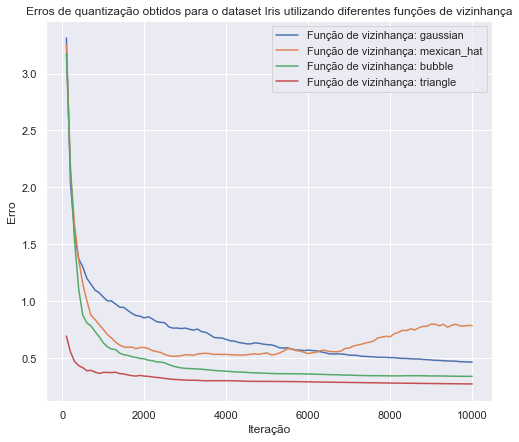

In [330]:
learning_rate = 0.01 # Cenário 1 - Taxa de aprendizado igual a 0.01

soms = []
for function in neighborhood_functions:  
    som, iter_x, q_error, t_error = SOM_classification(data, x=x, y=y, input_len=input_len, sigma=sigma, 
                                                       learning_rate=learning_rate, neighborhood_function=function, 
                                                       Num_iterations=Num_iterations, dataset_name=dataset_name)
    label = "Função de vizinhança: "+function
    plt.plot(iter_x, q_error, label=label)
    soms.append(som)

plt.title('Erros de quantização obtidos para o dataset ' + dataset_name + ' utilizando diferentes funções de vizinhança')
plt.ylabel('Erro')
plt.xlabel('Iteração') 
plt.legend(loc='upper right', ncol=1)

#### Visualização dos resultados utilizado o modelo SOM que apresentou o menor erro de quantização

In [331]:
som = soms[3] # quarto modelo, obtido utilziando a função 'triangle'

#### Mapa: U-Matrix

Distância entre cada elemento e seus vizinhos. Áreas de baixa distância entre vizinhos indicam grupos de elementos que são similares, enquanto que áreas de grandes distâncias indicam os elementos que são mais diferentes, indicando barreiras naturais entre os grupos.

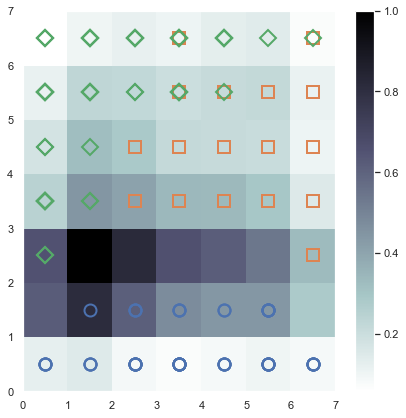

In [332]:
U_matrix(som, x, y)

#### Hit map - Activations frequencies

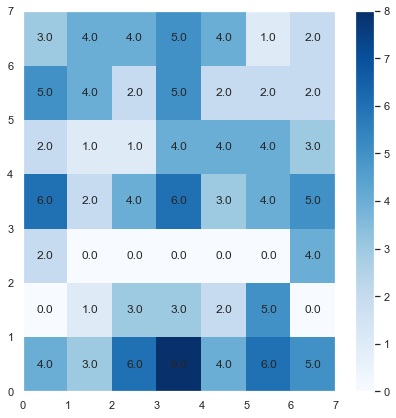

In [333]:
Hitmap(som, data, x, y)

#### Heat map

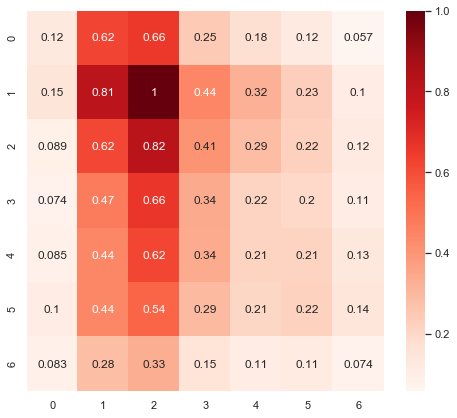

In [334]:
Heatmap(som, x, y)

#### Mapa: Class pies

Este mapa proporciona uma visão global de como os agrupamentos de hits são distribuídos ao longo do espaço. Este mapa apresenta a rede SOM como uma série de *pie charts* que apresentam a distribuição de compostos ativos e inativos em cada célula.

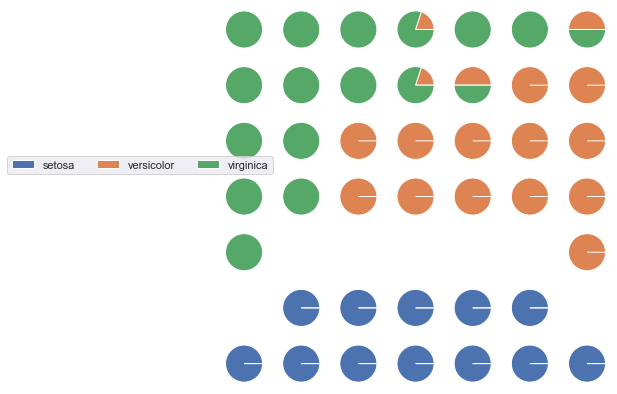

In [335]:
ClassPies(som, data, targets, classes, x, y)

##### Cenário 2 - Taxa de aprendizado igual a 0.1

iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.1 and 'gaussian' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4725713737029785
 topographic error: 0.46


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.1 and 'mexican_hat' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.9620575348648646
 topographic error: 0.0


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.1 and 'bubble' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.3256176516675821
 topographic error: 0.17333333333333334


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.1 and 'triangle' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.22667347929336346
 topographic error: 0.9




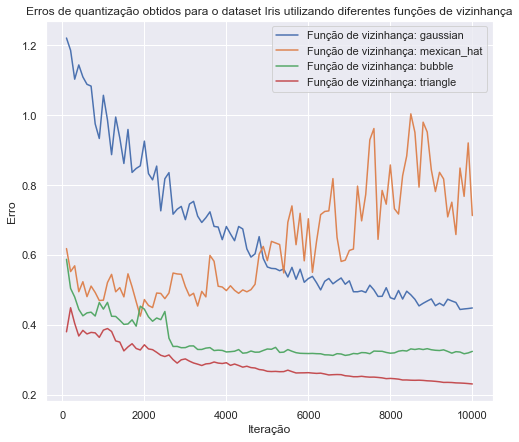

In [336]:
learning_rate = 0.1

soms = []
for function in neighborhood_functions:  
    som, iter_x, q_error, t_error = SOM_classification(data, x=x, y=y, input_len=input_len, sigma=sigma, 
                                                       learning_rate=learning_rate, neighborhood_function=function, 
                                                       Num_iterations=Num_iterations, dataset_name=dataset_name)
    label = "Função de vizinhança: "+function
    plt.plot(iter_x, q_error, label=label)
    soms.append(som)

plt.title('Erros de quantização obtidos para o dataset ' + dataset_name + ' utilizando diferentes funções de vizinhança')
plt.ylabel('Erro')
plt.xlabel('Iteração') 
plt.legend(loc='upper right', ncol=1)

#### Visualização dos resultados utilizado o modelo SOM que apresentou o menor erro de quantização

In [338]:
som = soms[3] # quarto modelo, obtido utilizando a função 'triangle'

#### Mapa: U-Matrix

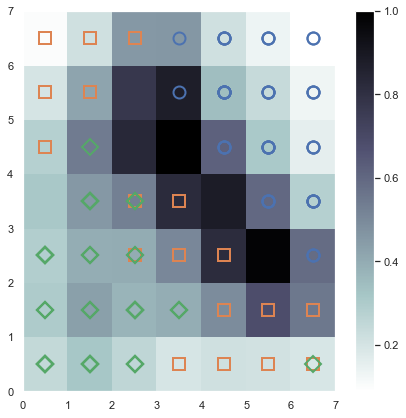

In [339]:
U_matrix(som, x, y)

#### Hit map - Activations frequencies

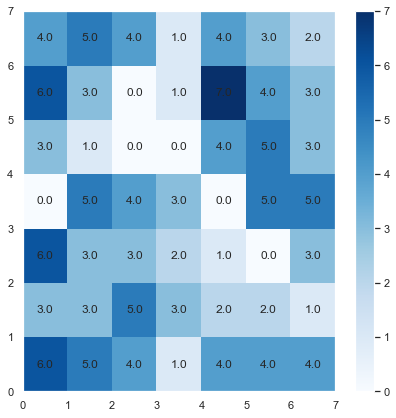

In [340]:
Hitmap(som, data, x, y)

#### Heat map

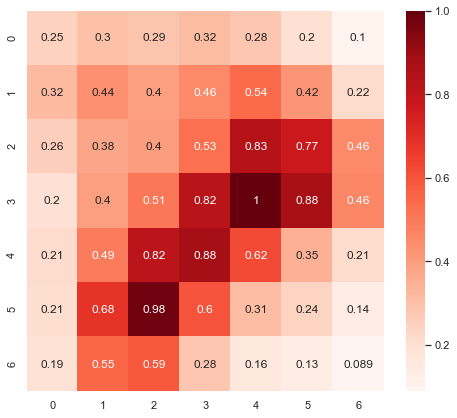

In [341]:
Heatmap(som, x, y)

#### Mapa: Class pies

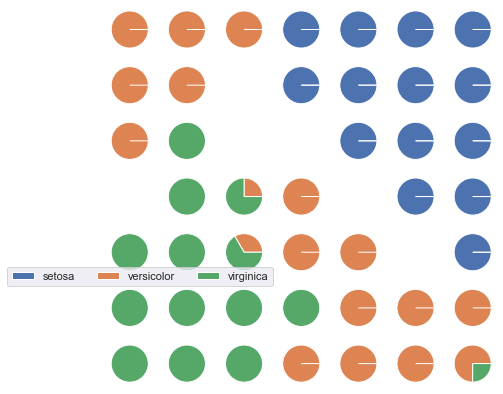

In [342]:
ClassPies(som, data, targets, classes, x, y)

##### Cenário 3 - Taxa de aprendizado igual a 0.5

iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.5 and 'gaussian' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.6561380591055307
 topographic error: 0.8533333333333334


iteration=5699 status=57.00%

C:\Users\Willian\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2481: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
C:\Users\Willian\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2480: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.5 and 'mexican_hat' neighbouring function...
 [  2662 / 10000 ]  27% - 0:00:02 left 

C:\Users\Willian\Anaconda3\lib\site-packages\minisom.py:258: RuntimeWarning: overflow encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)
C:\Users\Willian\Anaconda3\lib\site-packages\minisom.py:258: RuntimeWarning: invalid value encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)


 [  3297 / 10000 ]  33% - 0:00:02 left 

 [  3932 / 10000 ]  39% - 0:00:02 left 

 [  4279 / 10000 ]  43% - 0:00:02 left 

 [  4882 / 10000 ]  49% - 0:00:01 left 

 [  5549 / 10000 ]  55% - 0:00:01 left 

 [  6073 / 10000 ]  61% - 0:00:01 left 

 [  6761 / 10000 ]  68% - 0:00:01 left 

 [  7277 / 10000 ]  73% - 0:00:00 left 

 [  7942 / 10000 ]  79% - 0:00:00 left 

 [  8503 / 10000 ]  85% - 0:00:00 left 

 [  9081 / 10000 ]  91% - 0:00:00 left 

 [  9549 / 10000 ]  95% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: nan


 topographic error: 1.0


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.5 and 'bubble' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.32815286922083337
 topographic error: 0.4866666666666667


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.5 and 'triangle' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.21791960328804924
 topographic error: 0.82




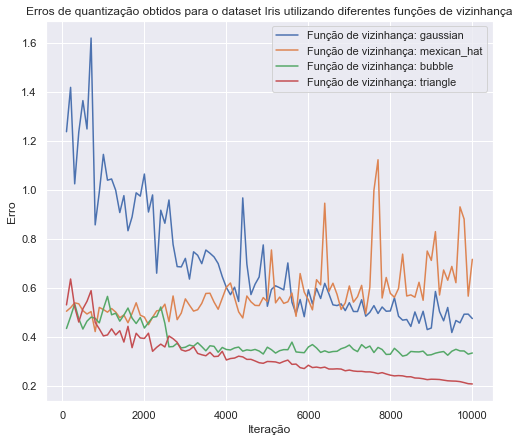

In [343]:
learning_rate = 0.5

soms = []
for function in neighborhood_functions:  
    som, iter_x, q_error, t_error = SOM_classification(data, x=x, y=y, input_len=input_len, sigma=sigma, 
                                                       learning_rate=learning_rate, neighborhood_function=function, 
                                                       Num_iterations=Num_iterations, dataset_name=dataset_name)
    label = "Função de vizinhança: "+function
    plt.plot(iter_x, q_error, label=label)
    soms.append(som)

plt.title('Erros de quantização obtidos para o dataset ' + dataset_name + ' utilizando diferentes funções de vizinhança')
plt.ylabel('Erro')
plt.xlabel('Iteração') 
plt.legend(loc='upper right', ncol=1)

#### Visualização dos resultados utilizado o modelo SOM que apresentou o menor erro de quantização

In [344]:
som = soms[3] # quarto modelo, obtido utilizando a função 'triangle'

#### Mapa: U-Matrix

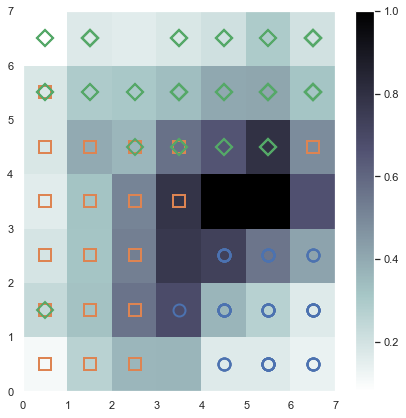

In [345]:
U_matrix(som, x, y)

#### Hit map - Activations frequencies

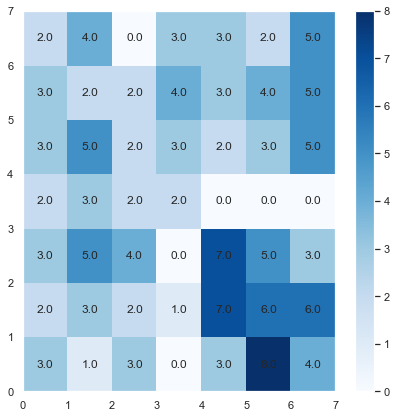

In [346]:
Hitmap(som, data, x, y)

#### Heat map

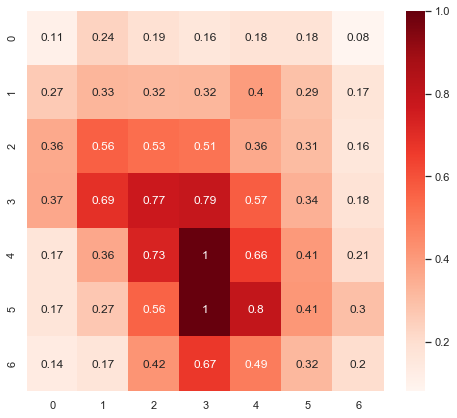

In [347]:
Heatmap(som, x, y)

#### Mapa: Class pies

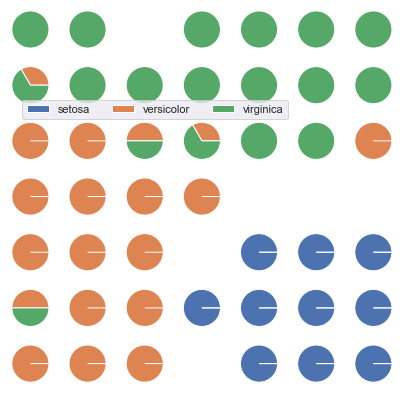

In [348]:
ClassPies(som, data, targets, classes, x, y)

***
### Test 2: Breast cancer dataset

#### Descrição do dataset

- **Título:** Breast cancer wisconsin (diagnostic) dataset;
- **Criador:** Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian;
- **Doador:** Nick Street;
- **Data:** Novembro, 1995;

- **Número de instâncias:** 569;
- **Número de atributos:** 30 numéricos, atributos preditivos e a classe:
    - raio (média das distâncias do centro aos pontos no perímetro);
    - textura (desvio padrão dos valores da escala de cinza);
    - perímetro;
    - área;
    - suavidade (variação local nos comprimentos do raio);
    - compacidade (perímetro ^ 2 / área - 1,0);
    - concavidade (severidade das porções côncavas do contorno);
    - pontos côncavos (número de partes côncavas do contorno);
    - simetria;
    - dimensão fractal ("aproximação da costa" - 1);
    
    - A média, erro padrão e "pior" ou maior (média dos três maiores valores) desses recursos foram calculados para cada imagem, resultando em 30 recursos. Por exemplo, o campo 3 é o raio médio, o campo 13 é o raio SE, o campo 23 é o pior raio;
    
    - classe:
        - WDBC-Malignant;
        - WDBC-Benign.
    
- **Distribuição das classes:** 212 - Malígnos, 357 - Benignos;
- **Mais informações:** https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer.

#### Dados de entrada

In [355]:
dataset_name = 'Breast Cancer'
cancer = load_breast_cancer()
cancer_data = cancer.data 
cancer_target = cancer.target

classes = cancer.target_names
features = cancer.feature_names

df_cancer = pd.DataFrame(cancer_data, columns=features)
df_cancer["class_id"] = cancer_target
df_cancer["class"] = 0

# Creating numeric class identifiers (0,1,2) 
df_cancer.loc[df_cancer["class_id"]==0, 'class'] = str(classes[0])
df_cancer.loc[df_cancer["class_id"]==1, 'class'] = str(classes[1])

#help(sns.pairplot)
#sns.pairplot(df_cancer.drop("class_id", axis=1), hue="class", height=3, diag_kind="kde")

In [356]:
data = cancer_data
targets = cancer_target

x = 7
y = 7
input_len = len(features)

##### Cenário 1 - Taxa de aprendizado igual a 0.01

iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'gaussian' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 101.5592382902999
 topographic error: 0.09490333919156414


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'mexican_hat' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 166.0772590509719
 topographic error: 0.0


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'bubble' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 69.84090470957234
 topographic error: 0.17750439367311072


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'triangle' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 54.29447159011104
 topographic error: 0.9753954305799648




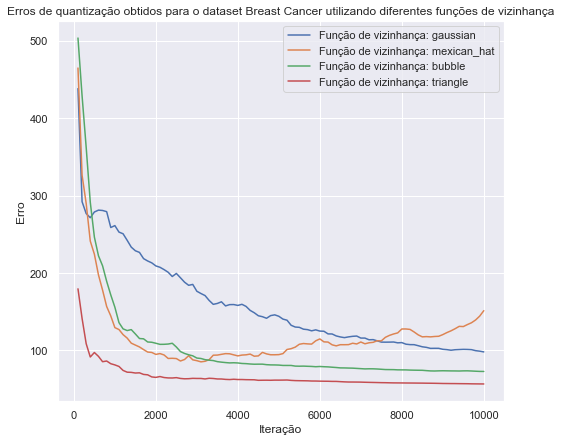

In [359]:
learning_rate = 0.01 # Cenário 1 - Taxa de aprendizado igual a 0.01

soms = []
for function in neighborhood_functions:  
    som, iter_x, q_error, t_error = SOM_classification(data, x=x, y=y, input_len=input_len, sigma=sigma, 
                                                       learning_rate=learning_rate, neighborhood_function=function, 
                                                       Num_iterations=Num_iterations, dataset_name=dataset_name)
    label = "Função de vizinhança: "+function
    plt.plot(iter_x, q_error, label=label)
    soms.append(som)

plt.title('Erros de quantização obtidos para o dataset ' + dataset_name + ' utilizando diferentes funções de vizinhança')
plt.ylabel('Erro')
plt.xlabel('Iteração') 
plt.legend(loc='upper right', ncol=1)

#### Visualização dos resultados utilizado o modelo SOM que apresentou o menor erro de quantização

In [360]:
som = soms[3] # quarto modelo, obtido utilizando a função 'triangle'

#### Mapa: U-Matrix

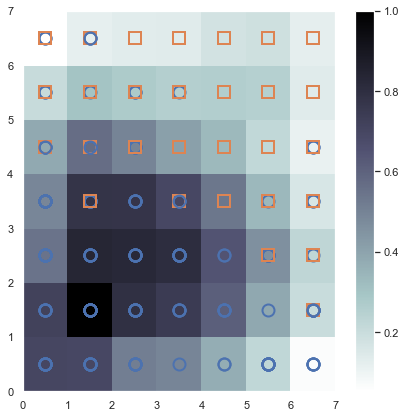

In [361]:
U_matrix(som, x, y)

#### Hit map - Activations frequencies

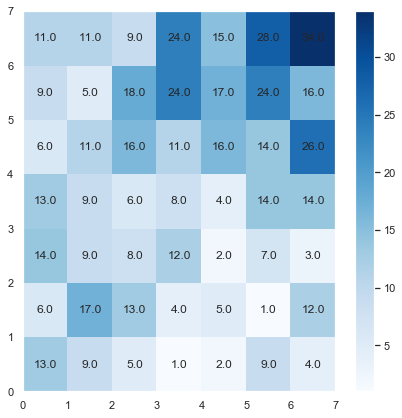

In [362]:
Hitmap(som, data, x, y)

#### Heat map

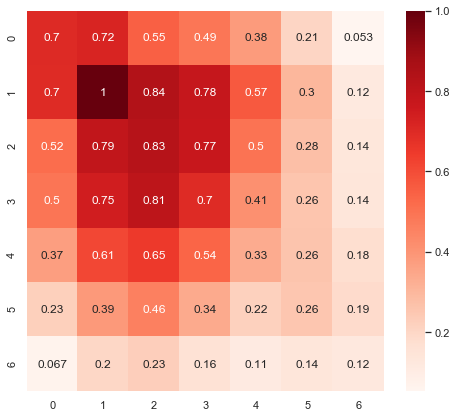

In [363]:
Heatmap(som, x, y)

#### Mapa: Class pies

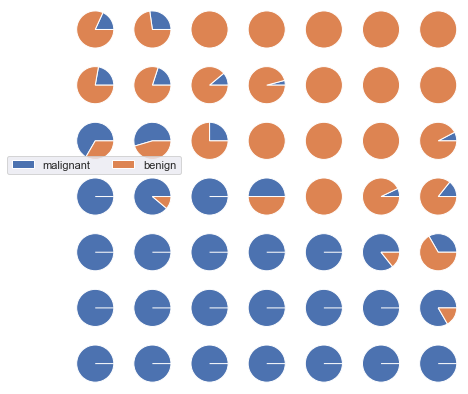

In [364]:
ClassPies(som, data, targets, classes, x, y)

***
### Test 3: Digits dataset

#### Descrição do dataset

- **Título:** Optical recognition of handwritten digits dataset;
- **Criador:** Alpaydin, E.;
- **Data:** Julho, 1998;

- **Número de instâncias:** 5620;
- **Número de atributos:** 64;
- **Mais informações:** https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits.

#### Dados de entrada

In [393]:
dataset_name = 'Digits'
digits = load_digits()
digits_data = digits.data 
digits_target = digits.target

classes = digits.target_names
images = digits.images

In [394]:
data = digits_data
targets = digits_target

x = 10
y = 10
input_len = len(digits_data[0,:])

##### Cenário 1 - Taxa de aprendizado igual a 0.01

iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'gaussian' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 25.782609759571805
 topographic error: 0.7245409015025042


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'mexican_hat' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 29.682104229537934
 topographic error: 0.0


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'bubble' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 22.526243569120503
 topographic error: 0.755147468002226


iteration=9999 status=100.00%

Training the model with a initial learning rate of 0.01 and 'triangle' neighbouring function...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 20.41327605677572
 topographic error: 0.8419588202559822




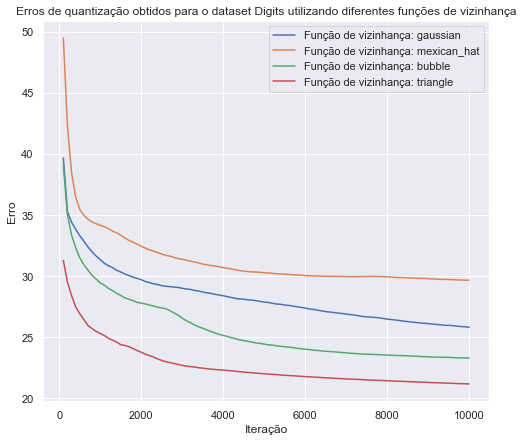

In [395]:
learning_rate = 0.01 # Cenário 1 - Taxa de aprendizado igual a 0.01

soms = []
for function in neighborhood_functions:  
    som, iter_x, q_error, t_error = SOM_classification(data, x=x, y=y, input_len=input_len, sigma=sigma, 
                                                       learning_rate=learning_rate, neighborhood_function=function, 
                                                       Num_iterations=Num_iterations, dataset_name=dataset_name)
    label = "Função de vizinhança: "+function
    plt.plot(iter_x, q_error, label=label)
    soms.append(som)

plt.title('Erros de quantização obtidos para o dataset ' + dataset_name + ' utilizando diferentes funções de vizinhança')
plt.ylabel('Erro')
plt.xlabel('Iteração') 
plt.legend(loc='upper right', ncol=1)

#### Visualização dos resultados utilizado o modelo SOM que apresentou o menor erro de quantização

In [396]:
som = soms[3] # quarto modelo, obtido utilizando a função 'triangle'

#### Mapa: U-Matrix

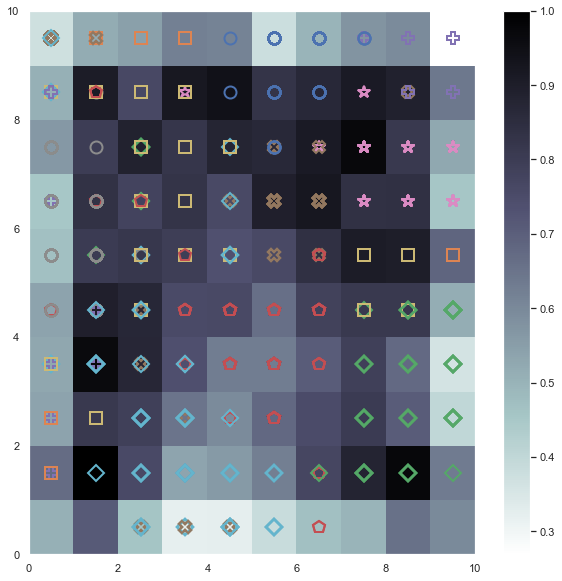

In [397]:
U_matrix(som, x, y)

#### Hit map - Activations frequencies

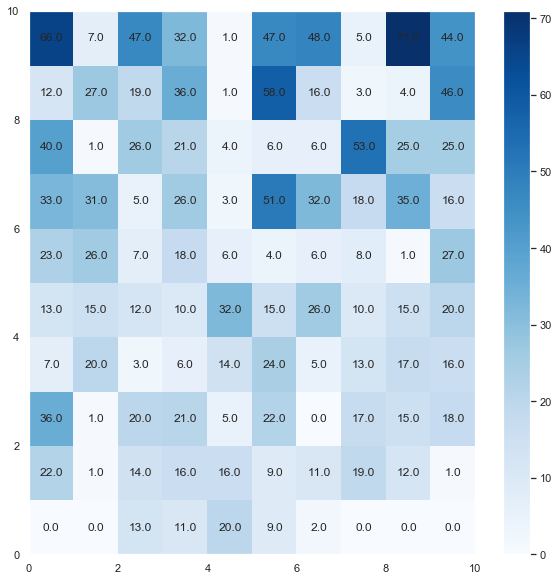

In [398]:
Hitmap(som, data, x, y)

#### Heat map

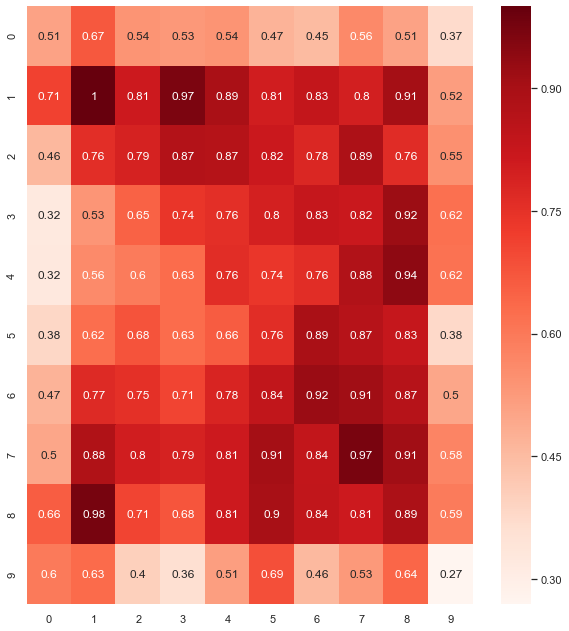

In [399]:
Heatmap(som, x, y)

#### Mapa: Class pies

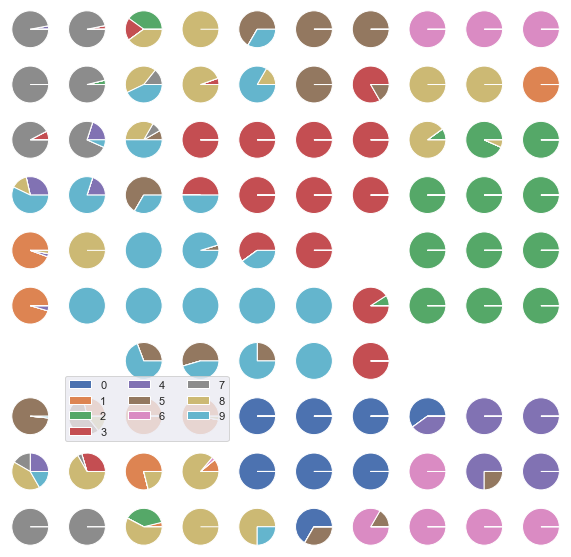

In [400]:
ClassPies(som, data, targets, classes, x, y)